<a href="https://colab.research.google.com/github/simsekergun/RandomlyRotated/blob/main/Classification_RandomlyRotatedScatterer_w_wo_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import AdamW

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
url1 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM1.csv'
df1 = pd.read_csv(url1, index_col=0)

url2 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM2.csv'
df2 = pd.read_csv(url2, index_col=0)

url3 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM3.csv'
df3 = pd.read_csv(url3, index_col=0)

url4 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM4.csv'
df4 = pd.read_csv(url4, index_col=0)

url5 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM5.csv'
df5 = pd.read_csv(url5, index_col=0)

url6 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM6.csv'
df6 = pd.read_csv(url6, index_col=0)

url7 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM7.csv'
df7 = pd.read_csv(url7, index_col=0)

url8 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM8.csv'
df8 = pd.read_csv(url8, index_col=0)

url9 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM9.csv'
df9 = pd.read_csv(url9, index_col=0)

url10 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM10.csv'
df10 = pd.read_csv(url10, index_col=0)

url11 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM11.csv'
df11 = pd.read_csv(url11, index_col=0)

url12 = 'https://raw.githubusercontent.com/simsekergun/RandomlyRotated/refs/heads/main/MNIST_rot_SIM12.csv'
df12 = pd.read_csv(url12, index_col=0)

df_all = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0)

# Reset the index
df_all = df_all.reset_index(drop=True)

print(f"Combined Shape: {df_all.shape}")

# View the first few rows
df_all.head()

Combined Shape: (12000, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,8.599444e-20,-6.231016e-19,-6.933704e-19,-2.736925e-19,4.245287e-20,1.006229e-19,9.058320e-20,1.892554e-19,1.105886e-19,-2.186010e-19,...,-1.513291e-18,-1.553155e-18,-1.459761e-18,-1.688467e-19,1.982808e-18,6.879230e-19,-1.795921e-18,-4.888217e-19,1.745913e-18,5
1,3.137589e-20,-6.429994e-19,-8.023542e-19,-5.501632e-19,-4.509170e-19,-6.149811e-19,-6.402798e-19,-2.548319e-19,6.587843e-20,3.990638e-19,...,-2.246684e-18,-2.292242e-18,-1.992845e-18,-4.320242e-19,1.900514e-18,6.989732e-19,-1.842764e-18,-6.105473e-19,1.613595e-18,0
2,-1.326605e-20,-4.580125e-19,-2.876271e-19,8.287229e-20,1.161408e-19,-2.394476e-19,-4.567253e-19,-3.680656e-19,-1.405961e-19,1.693667e-19,...,-1.867904e-18,-2.064785e-18,-2.134977e-18,-7.622166e-19,1.709335e-18,8.240770e-19,-1.593208e-18,-5.260953e-19,1.548896e-18,4
3,1.155195e-19,-2.451452e-19,-2.715376e-19,-1.088131e-19,5.316636e-20,2.419866e-19,2.123935e-19,4.197650e-20,-1.450483e-19,-2.382157e-19,...,-1.531262e-18,-1.838182e-18,-1.980286e-18,-6.558416e-19,1.871363e-18,7.939170e-19,-1.757816e-18,-7.118855e-19,1.296885e-18,1
4,-5.492622e-20,-7.036797e-19,-4.647136e-19,-4.597923e-20,1.422098e-19,1.169888e-19,-1.251926e-20,-7.236105e-20,3.206697e-20,1.285730e-19,...,-1.899248e-18,-1.930469e-18,-1.751551e-18,-4.451874e-19,1.822326e-18,7.606922e-19,-1.651533e-18,-4.209629e-19,1.823976e-18,9


In [3]:
# 2. Separate Features (X) and Target (y)
# We take the first 64 columns for X
X = df_all.iloc[:, 0:64].values

# We take the last column for y (index -1)
# We convert it to integers
y = df_all.iloc[:, -1].astype(int).values

# 3. Create the 90% Training and 10% Testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, train_size=0.90, random_state=42
)

# Verify the shapes
print(f"Total samples: {len(df_all)}")
print(f"X_train shape: {X_train.shape}") # Should be (N*0.9, 64)
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}")  # Should be (N*0.1, 64)
print(f"y_test shape:  {y_test.shape}")

Total samples: 12000
X_train shape: (10800, 64)
y_train shape: (10800,)
X_test shape:  (1200, 64)
y_test shape:  (1200,)


In [4]:
# 1. Initialize the scaler
scaler = StandardScaler()

# 2. Fit on training data and transform both sets
# to ensure both sets have a mean of 0 and a standard deviation of 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Reshape for the CNN (16 positions, 4 components)
X_train_cnn = X_train_scaled.reshape(-1, 16, 4)
X_test_cnn = X_test_scaled.reshape(-1, 16, 4)

## CLASSIFICATION WITH 1D Convolutional

In [5]:
def circular_pad_1d(x, kernel_size):
    # For a kernel of size K, we need to pad by (K-1)//2 on each side
    pad_size = (kernel_size - 1) // 2
    # Grab the last 'pad_size' elements and put them at the front
    # Grab the first 'pad_size' elements and put them at the back
    return tf.concat([x[:, -pad_size:, :], x, x[:, :pad_size, :]], axis=1)

In [6]:
model1 = models.Sequential([
    layers.Input(shape=(16, 4)),

    # Layer 1: Capture basic phase/amplitude relationships
    layers.Lambda(lambda x: circular_pad_1d(x, kernel_size=3)),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),

    # Layer 2: Capture more complex spatial patterns
    layers.Lambda(lambda x: circular_pad_1d(x, kernel_size=3)),
    layers.Conv1D(256, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),

    # Layer 3: Final high-level features
    layers.Lambda(lambda x: circular_pad_1d(x, kernel_size=3)),
    layers.Conv1D(512, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling1D(), # Maintains rotation invariance

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4), # Increased dropout to prevent overfitting
    layers.Dense(10, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model1.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping to prevent the model from collapsing
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

In [7]:
history = model1.fit(
    X_train_cnn, y_train,
    epochs=250,
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    callbacks=[early_stop]
)

Epoch 1/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.4959 - loss: 1.5211 - val_accuracy: 0.2750 - val_loss: 2.8073
Epoch 2/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.7190 - loss: 0.8591 - val_accuracy: 0.7792 - val_loss: 0.7163
Epoch 3/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.7864 - loss: 0.6567 - val_accuracy: 0.8000 - val_loss: 0.6674
Epoch 4/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.8152 - loss: 0.5675 - val_accuracy: 0.8175 - val_loss: 0.5575
Epoch 5/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.8411 - loss: 0.4696 - val_accuracy: 0.8375 - val_loss: 0.4941
Epoch 6/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.8609 - loss: 0.4136 - val_accuracy: 0.8367 - val_loss: 0.5340
Epoch 7/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.8850 - loss: 0.3389 - val_accuracy: 0.8292 - val_loss: 0.5167
Epoch 8/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.9062 - loss: 0

Test Accuracy: 84.58%
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       110
           1       0.96      0.98      0.97       144
           2       0.84      0.77      0.81       115
           3       0.70      0.85      0.77       114
           4       0.86      0.78      0.82       125
           5       0.78      0.81      0.79       108
           6       0.83      0.89      0.86       110
           7       0.96      0.81      0.88       136
           8       0.77      0.77      0.77       108
           9       0.83      0.82      0.83       130

    accuracy                           0.85      1200
   macro avg       0.85      0.84      0.84      1200
weighted avg       0.85      0.85      0.85      1200



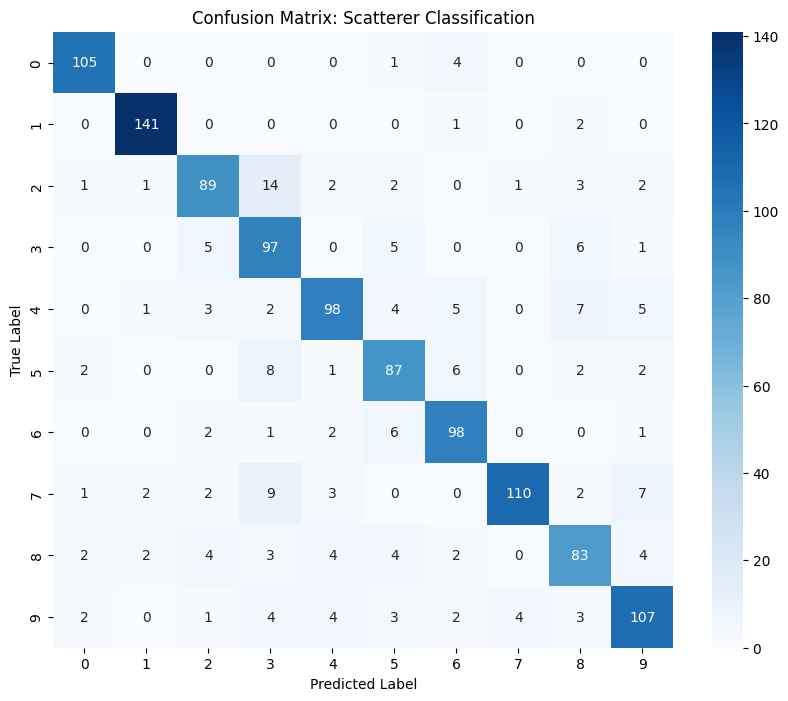

In [8]:
# 1. Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# 2. Generate Predictions
# y_pred will be the probability distribution; we take the argmax to get the class
y_pred_probs = model1.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Detailed Classification Report
# This shows precision, recall, and f1-score for every class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Scatterer Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## CLASSIFICATION WITH SELF ATTENTION

In [9]:
class ExpandDims(layers.Layer):
    """Wrapper for tf.expand_dims as a Keras layer"""
    def __init__(self, axis=1, **kwargs):
        super().__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.expand_dims(inputs, axis=self.axis)

    def compute_output_shape(self, input_shape):
        new_shape = list(input_shape)
        new_shape.insert(self.axis, 1)
        return tuple(new_shape)

class Squeeze(layers.Layer):
    """Wrapper for tf.squeeze as a Keras layer"""
    def __init__(self, axis=None, **kwargs):
        super().__init__(**kwargs)
        self.axis = axis

    def call(self, inputs):
        return tf.squeeze(inputs, axis=self.axis)

class SelfAttentionBlock(layers.Layer):
    """Multi-head self-attention block as a Keras layer"""
    def __init__(self, head_size=128, num_heads=4, dropout=0.2, **kwargs):
        super().__init__(**kwargs)
        self.head_size = head_size
        self.num_heads = num_heads
        self.dropout = dropout

    def build(self, input_shape):
        self.layer_norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.attention = layers.MultiHeadAttention(
            num_heads=self.num_heads,
            key_dim=self.head_size // self.num_heads,
            dropout=self.dropout
        )
        self.dropout1 = layers.Dropout(self.dropout)
        self.add1 = layers.Add()

        self.layer_norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dense1 = layers.Dense(self.head_size * 2, activation='relu')
        self.dropout2 = layers.Dropout(self.dropout)
        self.dense2 = layers.Dense(input_shape[-1])  # Match input dimension
        self.dropout3 = layers.Dropout(self.dropout)
        self.add2 = layers.Add()

    def call(self, inputs):
        # Layer normalization and attention
        x = self.layer_norm1(inputs)
        attention_output = self.attention(x, x)
        attention_output = self.dropout1(attention_output)
        x = self.add1([inputs, attention_output])

        # Feed-forward network
        x_norm = self.layer_norm2(x)
        ff_output = self.dense1(x_norm)
        ff_output = self.dropout2(ff_output)
        ff_output = self.dense2(ff_output)
        ff_output = self.dropout3(ff_output)

        output = self.add2([x, ff_output])
        return output

    def compute_output_shape(self, input_shape):
        return input_shape

class AttentionPooling(layers.Layer):
    """Attention-based pooling layer"""
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, input_shape):
        self.dense = layers.Dense(1, activation='tanh')
        self.softmax = layers.Softmax(axis=1)

    def call(self, inputs):
        # Compute attention weights
        attention_weights = self.dense(inputs)  # Shape: (batch, seq_len, 1)
        attention_weights = self.softmax(attention_weights)

        # Apply attention weights
        weighted_sum = tf.reduce_sum(inputs * attention_weights, axis=1)
        return weighted_sum

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[2])

class SqueezeExcitation(layers.Layer):
    """Squeeze-and-Excitation attention layer"""
    def __init__(self, reduction_ratio=16, **kwargs):
        super().__init__(**kwargs)
        self.reduction_ratio = reduction_ratio

    def build(self, input_shape):
        channels = input_shape[-1]
        reduced_channels = max(1, channels // self.reduction_ratio)

        self.global_pool = layers.GlobalAveragePooling1D()
        self.dense1 = layers.Dense(reduced_channels, activation='relu')
        self.dense2 = layers.Dense(channels, activation='sigmoid')

    def call(self, inputs):
        # Squeeze
        se = self.global_pool(inputs)

        # Excitation
        se = self.dense1(se)
        se = self.dense2(se)

        # Reshape and scale
        se = tf.expand_dims(se, axis=1)  # Add sequence dimension
        return inputs * se

    def compute_output_shape(self, input_shape):
        return input_shape



In [10]:
# Build the model
inputs = layers.Input(shape=(16, 4))

# Initial feature extraction
x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)

# Self-attention block
x = SelfAttentionBlock(head_size=128, num_heads=4, dropout=0.2)(x)

# CNN block
x = layers.Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv1D(256, kernel_size=3, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Dropout(0.2)(x)
x_pooled = layers.GlobalMaxPooling1D()(x)

# Dense layers with SE attention
x = layers.Dense(
    256,
    activation='relu',
    kernel_regularizer=regularizers.l2(1e-4)
)(x_pooled)
x = layers.BatchNormalization()(x)

# Add sequence dimension for SE, then remove it
x_expanded = ExpandDims(axis=1)(x)
x_se = SqueezeExcitation(reduction_ratio=16)(x_expanded)
x = Squeeze(axis=1)(x_se)  # Remove sequence dim

x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model2 = models.Model(inputs=inputs, outputs=outputs)

# Compile
model2.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=3e-4, weight_decay=5e-4),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 16, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 16, 128)        │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 16, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ self_attention_block            │ (None, 8, 128)         │             0 │
│ (SelfAttentionBlock)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 8, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 8, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 256)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ expand_dims (ExpandDims)        │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ squeeze_excitation              │ (None, 1, 256)         │             0 │
│ (SqueezeExcitation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ squeeze (Squeeze)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             

 Total params: 485,642 (1.85 MB)

 Trainable params: 483,082 (1.84 MB)

 Non-trainable params: 2,560 (10.00 KB)

In [11]:
history = model2.fit(
    X_train_cnn, y_train,
    epochs=250, # Give it more time to break out of the "1"s trap
    batch_size=32,
    validation_data=(X_test_cnn, y_test),
    callbacks=[early_stop]
)

Epoch 1/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.2550 - loss: 2.4650 - val_accuracy: 0.4892 - val_loss: 1.5182
Epoch 2/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.4945 - loss: 1.5649 - val_accuracy: 0.6750 - val_loss: 1.0138
Epoch 3/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 55s 105ms/step - accuracy: 0.5849 - loss: 1.2874 - val_accuracy: 0.7225 - val_loss: 0.8776
Epoch 4/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 27s 63ms/step - accuracy: 0.6485 - loss: 1.0880 - val_accuracy: 0.7533 - val_loss: 0.7643
Epoch 5/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.6820 - loss: 0.9763 - val_accuracy: 0.7875 - val_loss: 0.6855
Epoch 6/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.7199 - loss: 0.8731 - val_accuracy: 0.8050 - val_loss: 0.6336
Epoch 7/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.7406 - loss: 0.8190 - val_accuracy: 0.8167 - val_loss: 0.5993
Epoch 8/250
338/338 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.7579 - loss: 

Test Accuracy: 87.67%
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.96      0.97      0.96       144
           2       0.86      0.82      0.84       115
           3       0.91      0.85      0.88       114
           4       0.85      0.84      0.84       125
           5       0.85      0.86      0.86       108
           6       0.81      0.95      0.87       110
           7       0.94      0.88      0.90       136
           8       0.79      0.82      0.81       108
           9       0.84      0.83      0.83       130

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.87      1200
weighted avg       0.88      0.88      0.88      1200



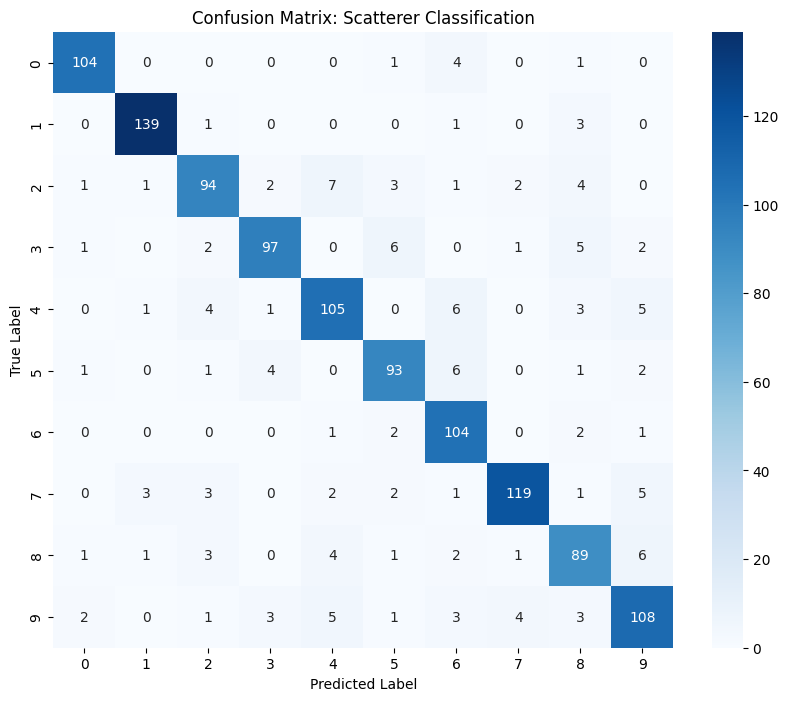

In [12]:
# 1. Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# 2. Generate Predictions
# y_pred will be the probability distribution; we take the argmax to get the class
y_pred_probs = model2.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Scatterer Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

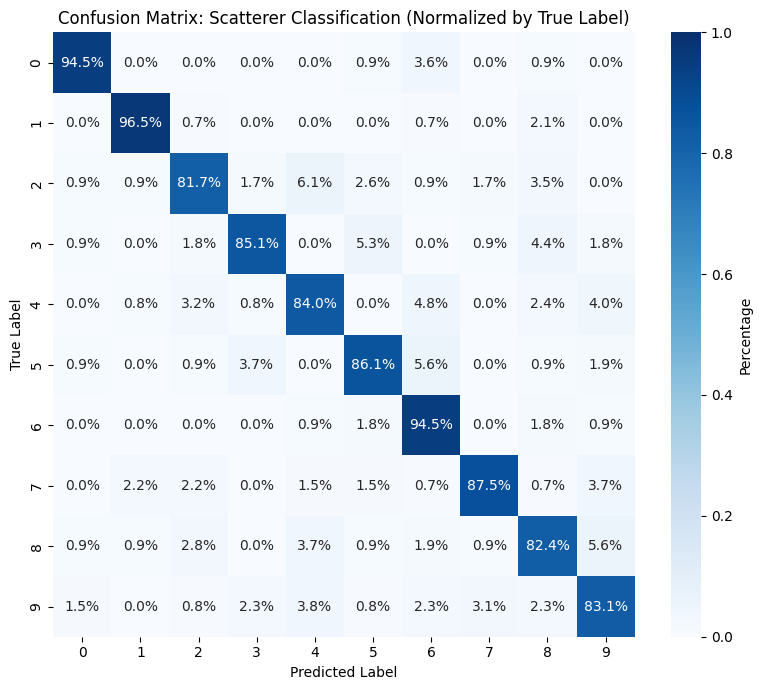

In [13]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 7))
sns.heatmap(cm_normalized,
            annot=True,
            fmt='.1%',  # Format as percentage with 2 decimal places
            cmap='Blues',
            vmin=0, vmax=1,  # Set color scale from 0% to 100%
            cbar_kws={'label': 'Percentage'})

plt.title('Confusion Matrix: Scatterer Classification (Normalized by True Label)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## 10% Random Noise Performance

In [19]:
noise_factor = 0.1
noise_test = noise_factor * np.random.normal(loc=0.0, scale=np.std(X_test_cnn), size=X_test_cnn.shape)
# Add the noise to the original data
X_test_cnn_noisy = X_test_cnn + noise_test

In [20]:
test_loss, test_acc = model1.evaluate(X_test_cnn_noisy, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

test_loss, test_acc = model2.evaluate(X_test_cnn_noisy, y_test, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Test Accuracy: 82.00%
Test Accuracy: 87.00%


## SVM

In [21]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

# 1. Prepare Data: SVMs expect (n_samples, n_features)
# Flattening the (16, 4) input into a 64-dimensional vector
X_train_flat = X_train_cnn.reshape(X_train_cnn.shape[0], -1)
X_test_flat = X_test_cnn.reshape(X_test_cnn.shape[0], -1)

# 2. Scaling: Crucial for SVM performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# 3. Define and Train the SVM
# Using RBF kernel to capture non-linear relationships similar to your ReLU layers
svm_model = svm.SVC(
    kernel='rbf',
    C=1.0,          # Regularization parameter
    gamma='scale',  # Kernel coefficient
    probability=True
)

svm_model.fit(X_train_scaled, y_train)

# 4. Evaluation
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Test Accuracy: 80.75%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       110
           1       0.87      0.96      0.91       144
           2       0.76      0.78      0.77       115
           3       0.77      0.80      0.78       114
           4       0.76      0.72      0.74       125
           5       0.77      0.72      0.75       108
           6       0.79      0.90      0.84       110
           7       0.88      0.83      0.86       136
           8       0.73      0.65      0.69       108
           9       0.78      0.76      0.77       130

    accuracy                           0.81      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.81      0.81      0.81      1200



## XGB

In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# 1. Prepare Data: Flatten (16, 4) -> (64,)
X_train_xgb = X_train_cnn.reshape(X_train_cnn.shape[0], -1)
X_test_xgb = X_test_cnn.reshape(X_test_cnn.shape[0], -1)

# 2. Initialize the XGBClassifier
# We set objective to 'multi:softprob' for multi-class classification
xgb_model = xgb.XGBClassifier(
    n_estimators=100,      # Number of boosting rounds (trees)
    learning_rate=0.1,     # Equivalent to 'eta', controls the step size
    max_depth=6,           # Depth of each tree
    subsample=0.8,         # Fraction of samples used per tree (prevents overfitting)
    colsample_bytree=0.8,  # Fraction of features used per tree
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# 3. Fit the model
xgb_model.fit(
    X_train_xgb, y_train,
    eval_set=[(X_test_xgb, y_test)],
    verbose=False
)

# 4. Evaluation
y_pred_xgb = xgb_model.predict(X_test_xgb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost Test Accuracy: {xgb_accuracy*100:.2f}%")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:06:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Accuracy: 82.42%
